We start by importing the relevant libraries. All are already pre-installed in Google Colab. We use Tensorflow and Keras to import and executed the model, Numpy to manipulate the image data, and matplotlib to visualise the image.

Load TensorFlow, Keras, VGG16 and Python libraries.

In [3]:
# %tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


Then, we load the pre-trained VGG16 model and print a model summary. This may take a few seconds since the VGG16 model is downloaded.

We can examine its structure to see the layers that make up the network. Don't worry if that does not make sense to you at this point. We will examine the related concepts in Week 9 when we discuss Computer Vision.

In [4]:
model = VGG16()

553467096/553467096 [==============================] - 15s 0us/step


In [5]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Now, let's load an image from the net and save it to a file on the local Cloab virtual machine.

In [6]:
image_source = 'https://images.unsplash.com/photo-1532974297617-c0f05fe48bff?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=700&q=80'
image=tf.keras.utils.get_file(origin=image_source,fname='car.jpg')

74610/74610 [==============================] - 0s 0us/step


Resize image to fit VGG16's expectations.

In [7]:
image = load_img(image, target_size=(224, 224))

Let's look at the image:

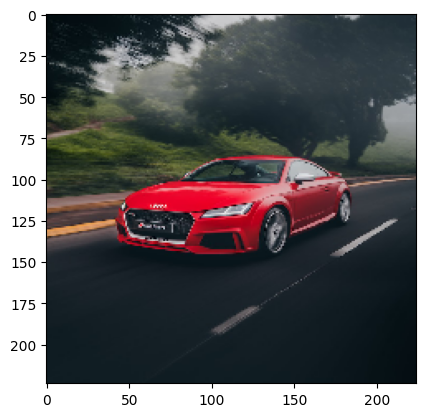

In [8]:
plt.imshow(image);

To feed the image into the VGG16 net, we must

* convert the image to a numeric array,
* transform the dimensions into the shape required by VGG16, and
* pre-process the image data values to meet VGG16's expectations.

In [9]:
image = tf.keras.preprocessing.image.img_to_array(image)

In [10]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [11]:
image = preprocess_input(image)

After these transformations, the image is represented as follows ("..." means that the arrays are not printed in full as they are too large):

In [12]:
image

array([[[[ -86.939   , -104.779   , -120.68    ],
         [ -79.939   ,  -97.779   , -113.68    ],
         [ -80.939   ,  -98.779   , -114.68    ],
         ...,
         [ -47.939003,  -69.779   ,  -90.68    ],
         [ -47.939003,  -69.779   ,  -90.68    ],
         [ -48.939003,  -70.779   ,  -91.68    ]],

        [[ -88.939   , -106.779   , -122.68    ],
         [ -86.939   , -104.779   , -120.68    ],
         [ -84.939   , -102.779   , -118.68    ],
         ...,
         [ -48.939003,  -70.779   ,  -91.68    ],
         [ -48.939003,  -70.779   ,  -91.68    ],
         [ -39.939003,  -61.779   ,  -82.68    ]],

        [[ -89.939   , -104.779   , -121.68    ],
         [ -88.939   , -103.779   , -120.68    ],
         [ -88.939   , -103.779   , -120.68    ],
         ...,
         [ -49.939003,  -71.779   ,  -92.68    ],
         [ -46.939003,  -68.779   ,  -89.68    ],
         [ -35.939003,  -57.779   ,  -78.68    ]],

        ...,

        [[ -68.939   ,  -87.779   , -1

Now, we feed the image data into the VGG16 network to predict the probability that the image belongs to each of the 1000 possible object types VGG16 has been trained on. This may take a few seconds, in particular if you are using a Colab kernel without GPU support.

In [13]:
p = model.predict(image)

1/1 [==============================] - 7s 7s/step


Since looking at 1000 values between 0 and 1 is not much fun, we convert the raw probabilities to class labels, which represent the human-readable labels associated with each object type.

We will retain the labels of the top 5 object types the VGG16 network identified as being the most likley object shown in the image.

In [14]:
labels = decode_predictions(p)

35363/35363 [==============================] - 0s 0us/step


Print the labels and their probabilities (higher is better) for the top 5 results for the first image we fed into the network (VGG16 is setup to process multiple images at the same time, hence we must use the subscript [0] in the loop header to obtain the predictions for the image we fed into the net).

In [15]:
for label in labels[0]:
  print(label)

('n03100240', 'convertible', 0.4722256)
('n04037443', 'racer', 0.24300092)
('n04285008', 'sports_car', 0.19686663)
('n02974003', 'car_wheel', 0.035072602)
('n02814533', 'beach_wagon', 0.020995902)


We can see that VGG16 thought that the image most likley shows a 'convertible' car (47% probability), or a 'racer' car (\~22% probability), or a 'sports_car' (\~21 probability). The remaining labels have fairly low probabilities associated with them hence we can't put much confidence in them. Overall, we can see that the network was fairly confident of this result, as there is a big gap between the top result and the second result.

Now, try again with another image:

Change the value of 'image_source' above and re-run the notebook from that point on.

Depending on what image you choose, you may get very different results.

Be sure to pick an image showing something that VGG16 knows about. Here is a list of object labels that the net can recognise:

In [16]:
import keras
sorted([ label for _, label in keras.applications.imagenet_utils.CLASS_INDEX.values() ])

['Afghan_hound',
 'African_chameleon',
 'African_crocodile',
 'African_elephant',
 'African_grey',
 'African_hunting_dog',
 'Airedale',
 'American_Staffordshire_terrier',
 'American_alligator',
 'American_black_bear',
 'American_chameleon',
 'American_coot',
 'American_egret',
 'American_lobster',
 'Angora',
 'Appenzeller',
 'Arabian_camel',
 'Arctic_fox',
 'Australian_terrier',
 'Band_Aid',
 'Bedlington_terrier',
 'Bernese_mountain_dog',
 'Blenheim_spaniel',
 'Border_collie',
 'Border_terrier',
 'Boston_bull',
 'Bouvier_des_Flandres',
 'Brabancon_griffon',
 'Brittany_spaniel',
 'CD_player',
 'Cardigan',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'Christmas_stocking',
 'Crock_Pot',
 'Dandie_Dinmont',
 'Doberman',
 'Dungeness_crab',
 'Dutch_oven',
 'Egyptian_cat',
 'English_foxhound',
 'English_setter',
 'English_springer',
 'EntleBucher',
 'Eskimo_dog',
 'European_fire_salamander',
 'European_gallinule',
 'French_bulldog',
 'French_horn',
 'French_loaf',
 'German_shepherd',
 'German_s

In [17]:
image_source_zebra='https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/endurance-ship-wreck-falklands-1646938106.jpg'

In [18]:
image_zebra=tf.keras.utils.get_file(origin=image_source_zebra,fname='endurance-ship-wreck-falklands-1646938106.jpg')

841091/841091 [==============================] - 0s 0us/step


In [19]:
image_zebra = load_img(image_zebra, target_size=(224, 224))

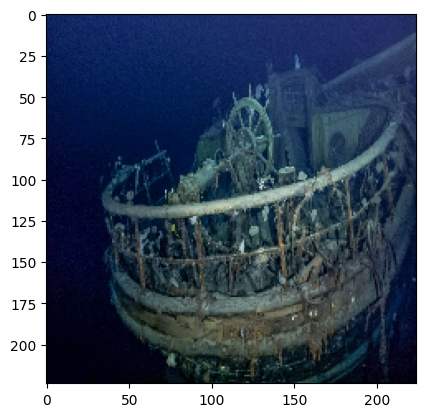

In [20]:
plt.imshow(image_zebra);

In [21]:
image_zebra = tf.keras.preprocessing.image.img_to_array(image_zebra)

In [22]:
image_zebra = image_zebra.reshape((1, image_zebra.shape[0], image_zebra.shape[1], image_zebra.shape[2]))

In [23]:
image_zebra = preprocess_input(image_zebra)

In [24]:
image_zebra

array([[[[ -11.939003,  -81.779   , -109.68    ],
         [  -8.939003,  -78.779   , -106.68    ],
         [  -6.939003,  -76.779   , -105.68    ],
         ...,
         [  -6.939003,  -71.779   ,  -90.68    ],
         [  -4.939003,  -67.779   ,  -86.68    ],
         [  -0.939003,  -63.779   ,  -82.68    ]],

        [[  -8.939003,  -78.779   , -106.68    ],
         [  -3.939003,  -73.779   , -102.68    ],
         [  -7.939003,  -78.779   , -104.68    ],
         ...,
         [  -6.939003,  -71.779   ,  -90.68    ],
         [  -6.939003,  -69.779   ,  -88.68    ],
         [  -3.939003,  -66.779   ,  -85.68    ]],

        [[ -10.939003,  -80.779   , -108.68    ],
         [  -2.939003,  -72.779   , -100.68    ],
         [  -6.939003,  -76.779   , -104.68    ],
         ...,
         [  -0.939003,  -65.779   ,  -84.68    ],
         [  -5.939003,  -68.779   ,  -87.68    ],
         [  -9.939003,  -72.779   ,  -91.68    ]],

        ...,

        [[ -90.939   , -115.779   , -1

In [25]:
p = model.predict(image_zebra)

1/1 [==============================] - 0s 22ms/step


In [26]:
labels = decode_predictions(p)

In [27]:
for label in labels[0]:
  print(label)

('n04606251', 'wreck', 0.114244476)
('n03947888', 'pirate', 0.094270796)
('n07930864', 'cup', 0.092301816)
('n03950228', 'pitcher', 0.09078107)
('n03443371', 'goblet', 0.08919126)
